In [1]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)

14

###  auto_mpg에 들어있는 컬럼에 따른 mpg 예측
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 
- 알고리즘 : knn
- 피쳐 : weight
- 타겟:  mpg

[1] 모듈 로딩 및 데이터 준비

In [4]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

In [5]:
houseDict = {x:[] for x in col}

In [6]:
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
    
# houseDF.iloc[1,:]

In [7]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


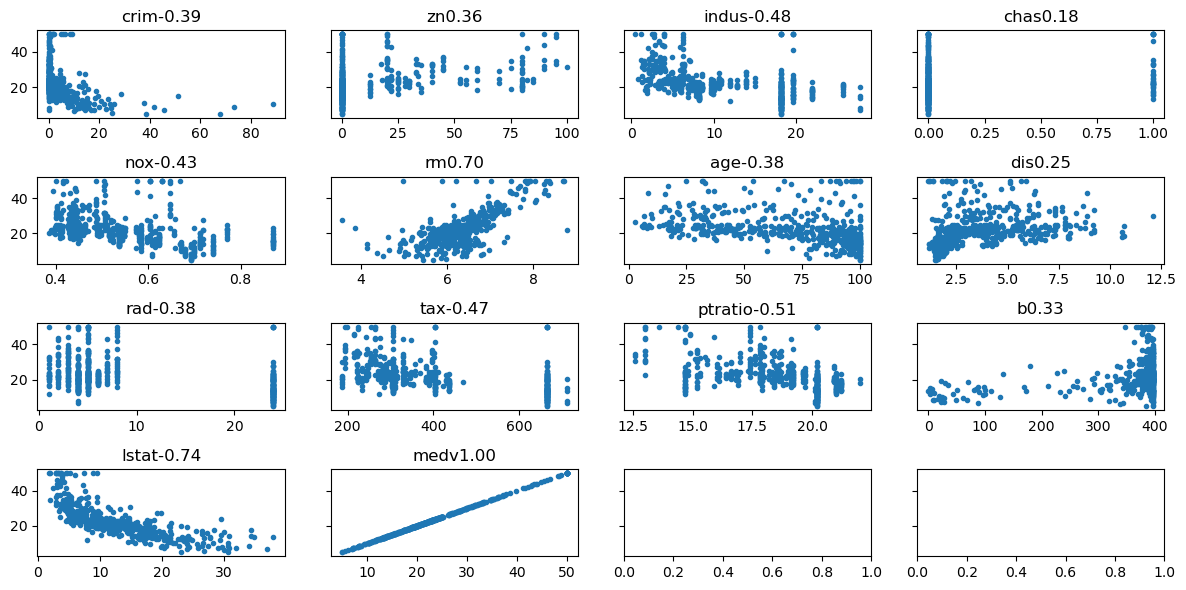

In [9]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


[2] 데이터분석 -탐색적 분석

medv 연관성 있는 데이터.
- rm, istat

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [10]:
feature = houDF[['lstat']]
target = houDF['medv']
## 1개이므로 민맥스필요없음

In [11]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [12]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 1) / X_test => 2D, (127, 1)
y_train => 1D (379,) / y_test => 2D, (127,)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

[4] 학습 진행

In [14]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor(n_neighbors=5)

In [15]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [16]:
print(model.n_features_in_)
print(model.n_samples_fit_)
# print(model.feature_names_in_)
print(model.effective_metric_)
#거리 재는 방법

1
379
euclidean


In [17]:
X_train.index[:3]

Index([218, 117, 195], dtype='int64')

In [23]:
## 4-3 훈련데이터 셋으로 예측 -=> predict(2d)
## - 무게에 대한 mpg 예측 결과
pre_medv = model.predict(X_train)
pre_medv

array([16.22, 17.46, 42.28, 45.62, 20.06, 10.56, 13.58, 13.3 , 21.3 ,
       15.16, 12.5 , 25.46, 32.9 , 22.12, 17.88, 22.12, 23.2 , 26.64,
       28.78, 27.88, 19.82, 18.  , 29.58, 17.58, 42.28, 13.58, 13.8 ,
       24.9 , 33.62, 15.1 , 26.06, 43.08, 25.46, 16.94, 30.82,  9.12,
       36.26, 26.76, 19.84, 21.54, 14.52, 25.34, 25.5 , 21.58, 19.9 ,
       21.16, 17.8 , 11.78, 17.88, 21.92, 42.28, 19.6 , 15.66, 25.98,
       42.28, 23.3 , 20.62, 20.18, 16.22, 45.62, 24.9 , 33.62, 22.  ,
       17.82, 20.16, 20.78, 11.7 , 23.2 , 12.08, 22.52, 28.62, 20.78,
       20.58, 34.12, 15.1 , 28.78, 25.46, 12.22, 29.98, 21.86, 17.06,
       33.62, 17.64, 32.86, 25.08, 20.38, 17.88, 19.78, 19.82, 21.62,
       29.98, 20.56, 20.62, 14.52, 12.02, 25.92, 20.88, 26.  , 22.04,
       15.16, 32.92, 28.64, 16.22, 15.6 , 27.32, 16.22, 24.32, 17.26,
       27.46, 17.8 , 21.32, 11.78, 20.88, 20.78, 25.48, 19.9 , 13.48,
       26.52, 45.08, 21.54, 13.14, 20.88, 20.78, 20.38, 26.16, 27.46,
       19.88, 30.08,

In [24]:
## 모듈화
r_dict = {x:[] for x in ['score', 'rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = model.score(x, y)
    pre_y = model.predict(x)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.7476187198612351, 0.6191070698616488],
 'rmse': [4.630648273198814, 5.605820372366928],
 'mse': [21.442903430079156, 31.425222047244084],
 'mae': [3.261477572559367, 4.206929133858267]}

In [25]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,rmse,mse,mae
train,0.7476,4.6306,21.4429,3.2615
test,0.6191,5.6058,31.4252,4.2069
diff,0.1285,0.9752,9.9823,0.9455


[5]최근접이웃 알고리즘의 동작원리 확인
- k개만큼 가까이 있는 데이터를 추출
- 회귀


In [27]:
#데이터 지정
X_train.head()

,lstat
218,17.92
117,15.37
195,2.97
162,1.92
219,10.50


In [28]:
y_train.head()

218    21.5
117    20.4
195    50.0
162    50.0
219    23.0
Name: medv, dtype: float64

In [29]:
## 인덱스 리셋
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 1) / X_test => 2D, (127, 1)
y_train => 1D (379,) / y_test => 2D, (127,)


In [30]:
#데이터지정
X_train.iloc[0], y_train[0]

(lstat    17.92
 Name: 0, dtype: float64,
 np.float64(21.5))

In [31]:
feature.mean()

lstat    12.653063
dtype: float64

In [32]:
distance, indices = model.kneighbors([[3000]])

c:\Users\matdo\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [33]:
indices = indices.reshape(-1)

In [34]:
y_train[indices]

284    13.8
202     8.4
306     7.4
35     14.4
339     7.2
Name: medv, dtype: float64

In [35]:
y_train[indices].index.tolist()
idx = y_train[indices].index.tolist()
idx

[284, 202, 306, 35, 339]

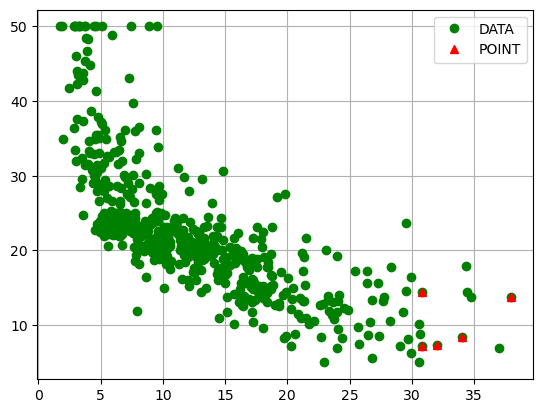

In [36]:
## 무게와 길이의 분포
plt.plot(feature, target,'og', label = 'DATA')
# plt.plot(X_train.iloc[0], y_train[0], '^b', label = 'POINT')
plt.plot(X_train.iloc[idx], y_train[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()

In [37]:
pre_mpg = y_train[indices].mean()

print(f" 무게 3000 mpg {pre_mpg}로 예측")


 무게 3000 mpg 10.24로 예측


[6] 최적의 K 찾기 <hr>
- 최근접 이웃 갯수 => k
- 기본값 : 5
- 나의 데이터에 최적인 K 찾기
    * 1~ 전체 데이터 수만큼 K값 변견한 KNR 인스턴스 생성
    * 학습, 예측, 성능평가, 비용계산 결과 비교
    * 성능평가 높고, 비용계산 낮은 K 결정.




In [45]:
# 데이터 개수
train_data = X_train
train_label = y_train
DATANUMS = train_data.shape[0]

#k 갯수에 따른 모델 성능과 비용함수값 저장
HISTORY = [[],[]] # [score_list, rmse_list]
HISTORY = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
    #KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    #KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    #KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)
    rmse = root_mean_squared_error(train_label, pre_)
    #저장
    HISTORY['score'].append(score)
    HISTORY['rmse'].append(rmse)
    
    
print(HISTORY)

{'score': [0.9446717440220795, 0.8562983478056413, 0.7849975653833453, 0.750672196065349, 0.7476187198612351, 0.73763632271645, 0.731671297349532, 0.7295623458053979, 0.7241371436347966, 0.7156003266656403, 0.7086089011493915, 0.7036627635326526, 0.7026856056602059, 0.702569120269052, 0.7013821181659484, 0.6959257253044324, 0.6963559319609957, 0.6958659516512824, 0.695536198984831, 0.6920264923488982, 0.6912739332549442, 0.6894347671003139, 0.6880959119983086, 0.6871476223996671, 0.6861929089030153, 0.6859555980560137, 0.6892374361243916, 0.6895455285125891, 0.6881018638408105, 0.6886628793293562, 0.6898459146453021, 0.6894005930631699, 0.6890031578441311, 0.6883508820587665, 0.6859034051636543, 0.6852702327835841, 0.6844851585908754, 0.6828213598118238, 0.6809455747857375, 0.6804039231941124, 0.6785892578379834, 0.6775135166363544, 0.6761155275667984, 0.6735290596166124, 0.6737954367098093, 0.6735593860211048, 0.6712560858599671, 0.6693459509737751, 0.6671049777642907, 0.6654614332198

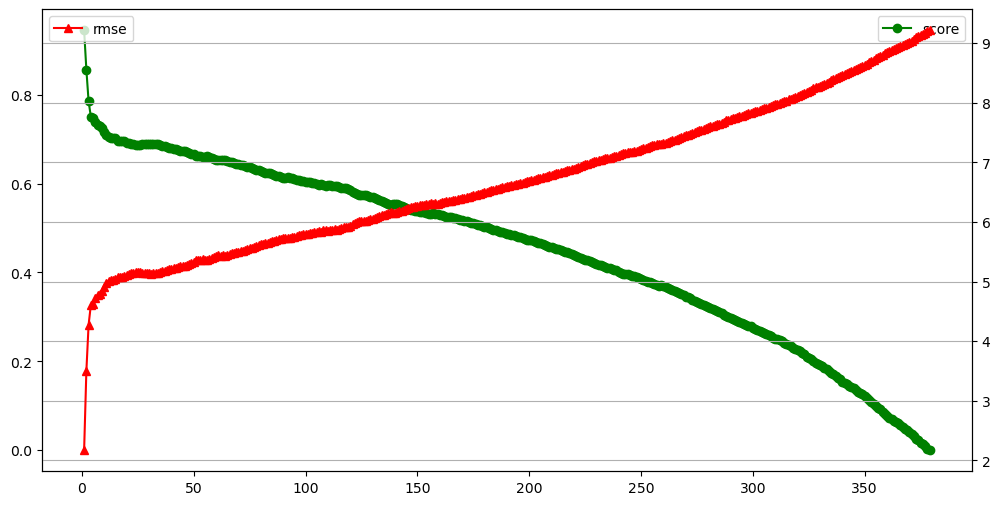

In [46]:
## 무게와 길이의 분포
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(range(1, DATANUMS+1), HISTORY['score'],'og-', label = 'score')
# for i in range(1, DATANUMS+1):
#     ax.text(i, HISTORY['score'][i-1], str(i))
# score 0~1 1이 이상적
ax2 = plt.twinx(ax)
ax2.plot(range(1, DATANUMS+1), HISTORY['rmse'],'^r-', label = 'rmse')
# for i in range(1, DATANUMS+1):
#     ax2.text(i, HISTORY['rmse'][i-1], str(i))
    

# rmse 0~1 0이 이상적
# plt.xlabel('k')
# plt.ylabel('rmse')
ax.legend()
ax2.legend()
plt.grid()
plt.show()

1~10 구간이 가장 좋음.
--> 데이터 수가 적어서 나타나는 현상.

In [47]:
print('SCORE', min(HISTORY['score']), max(HISTORY['score']))
print('RMSE', min(HISTORY['rmse']), max(HISTORY['rmse']))

SCORE 0.0 0.9446717440220795
RMSE 2.1681369749055306 9.217501679723062


In [59]:
#테스트 데이터 투입

test_data =  X_test
test_label = y_test
    #KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=5)

#KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

#KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)
rmse = root_mean_squared_error(test_label, pre_)

print(score, rmse)

0.760234095771368 4.447658501024137


## 목표 테스트 데이터에 잘 맞는 k값 찾기

ㅓ